# TimeSeries prediction models comparison

In [5]:
import pandas as pd
from pathlib import Path
import glob

import matplotlib.pyplot as plt

from utils import HORIZONS

In [6]:
# in results directory there is a list of json files. Each contains a json object. I want to load those files to a single pandas dataframe, where each file is one row

def read_results(directory='results') -> pd.DataFrame:
    frames = []
    for file in glob.glob(f"{directory}/*.json"):
        with open(file) as f:
            data = pd.read_json(f, typ='series', orient='index')
            frames.append(data)
    res = pd.concat(frames, axis=1).T
    return res

df = read_results()
df.head(20)

,mape,mse,rmse,mae,model,forecast_horizon,dataset,experiment_time,parameters
0,6.764675,0.010776,0.103807,0.075213,NaiveSeasonal,1,electricity,1715278115.881607,{'K': 1}
1,6.259882,0.009388,0.096891,0.069599,ARIMA,1,electricity,1715279492.626692,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
2,8.080169,0.041759,0.20435,0.089071,XGBModel,10,electricity,1715277717.013348,"{'lags': 168, 'lags_past_covariates': None, 'l..."
3,2.162213,0.002918,0.054021,0.023792,XGBModel,1,electricity,1715277716.261915,"{'lags': 168, 'lags_past_covariates': None, 'l..."
4,3.431986,0.007242,0.085102,0.037877,XGBModel,2,electricity,1715277716.445576,"{'lags': 168, 'lags_past_covariates': None, 'l..."
5,23.234333,0.111367,0.333717,0.257685,NaiveSeasonal,5,electricity,1715278117.517496,{'K': 1}
6,4.825865,0.014002,0.11833,0.05343,XGBModel,3,electricity,1715277716.633687,"{'lags': 168, 'lags_past_covariates': None, 'l..."
7,22.090513,0.102258,0.319779,0.247924,ARIMA,5,electricity,1715279563.90106,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."
8,15.94033,0.053352,0.23098,0.177157,NaiveSeasonal,3,electricity,1715278116.978999,{'K': 1}
9,10.933588,0.025473,0.159602,0.121658,ARIMA,2,electricity,1715279528.456136,"{'p': 3, 'd': 1, 'q': 0, 'seasonal_order': [0,..."


## Model comparison

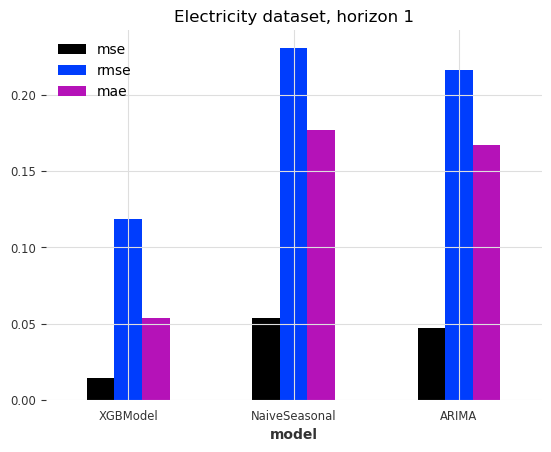

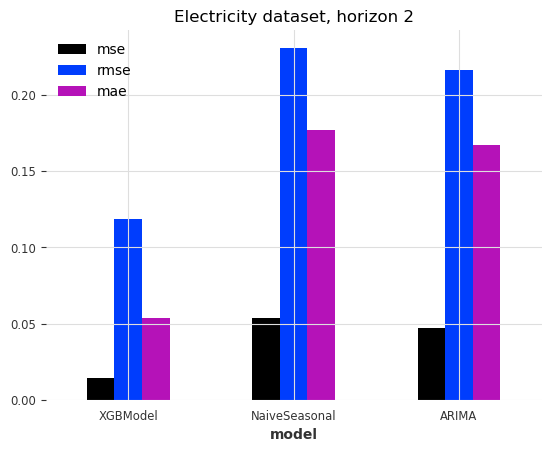

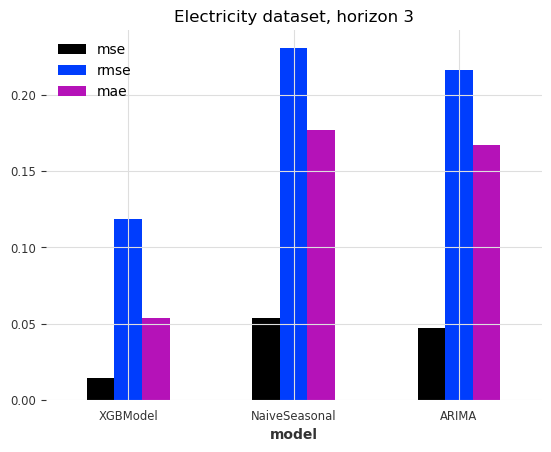

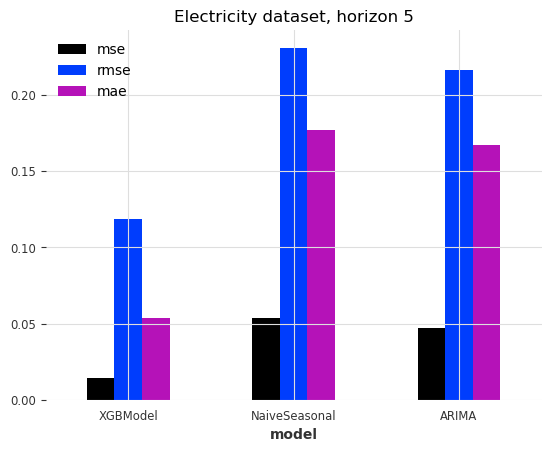

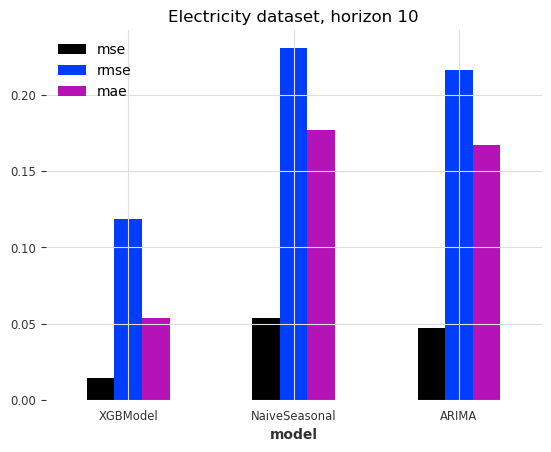

In [7]:
for horizon in HORIZONS:
  df_walmart = df[df['dataset'] == 'electricity']
  df_walmart = df_walmart[df_walmart['forecast_horizon'] == 3]
  df_walmart.plot(x='model', y=['mse', 'rmse', 'mae'], kind='bar')

  plt.title(f'Electricity dataset, horizon {horizon}')
  plt.xticks(rotation=0)
  plt.show()

### Walmart-sales

<Axes: xlabel='model'>

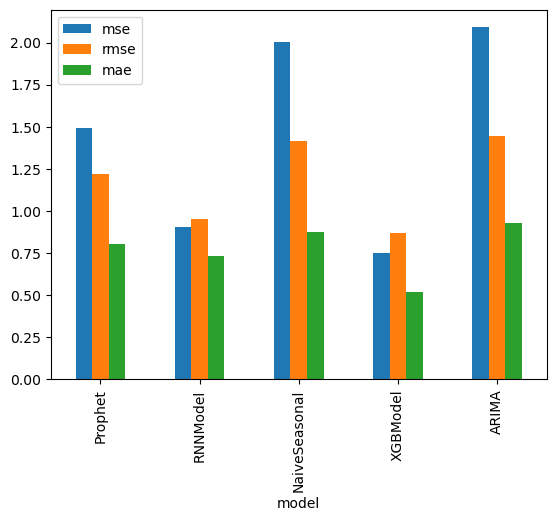

In [30]:
df_walmart = df[df['dataset'] == 'walmart-sales']

df_walmart.plot(x='model', y=['mse', 'rmse', 'mae'], kind='bar')